# 기본 셋팅

In [166]:
# 필요한 분석 셋 가져오기 
import pandas as pd 
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols 

from matplotlib import rc
rc('font', family='AppleGothic') # 한글 설정

In [121]:
# 파일 불러오기 
movie_fin = pd.read_csv("https://raw.githubusercontent.com/yujin-jo/mini-project-team1/main/1.%20Crawling/data/movie_fin.csv")
movie_fin = movie_fin.set_index(['순번'])
movie_fin.head(2)

,개봉연도,영화명,감독,등급,국적,장르,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
순번,,,,,,,,,,,,
1,2015,베테랑,류승완,15세이상관람가,한국,액션,105024756250,13395400,1064,4.62,3.69,4.0
2,2015,암살,최동훈,15세이상관람가,한국,액션,98463132781,12705700,1519,4.55,3.12,4.0


In [122]:
# 파일 기본 정보 확인하기 
movie_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   개봉연도     150 non-null    int64  
 1   영화명      150 non-null    object 
 2   감독       150 non-null    object 
 3   등급       150 non-null    object 
 4   국적       150 non-null    object 
 5   장르       150 non-null    object 
 6   전국매출액    150 non-null    int64  
 7   전국관객수    150 non-null    int64  
 8   전국스크린수   150 non-null    int64  
 9   관람객평균평점  150 non-null    float64
 10  전문가평균평점  150 non-null    float64
 11  왓챠평균평점   150 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 15.2+ KB


# I. 사전 분석 

## 1. 사전 분석2_기본 통계 분석 

**분석 방향**
- descrive 함수를 사용해 최대한 쉽게 기본 통계량을 분석해 대략적인 수치를 파악한다. 

In [124]:
movie_fin.describe()

,개봉연도,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
count,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.00000
mean,2017.000000,3.921249e+10,4.755840e+06,1279.420000,4.308000,3.103133,3.57800
std,1.418951,2.429103e+10,2.905744e+06,414.536974,0.270198,0.548895,0.36322
min,2015.000000,1.541792e+10,1.804112e+06,496.000000,3.270000,1.380000,2.40000
25%,2016.000000,2.163072e+10,2.686209e+06,1010.000000,4.200000,2.750000,3.40000
50%,2017.000000,3.045559e+10,3.667846e+06,1190.000000,4.340000,3.040000,3.60000
75%,2018.000000,4.718292e+10,5.581861e+06,1485.750000,4.500000,3.500000,3.87500
max,2019.000000,1.396480e+11,1.626494e+07,2835.000000,4.740000,4.550000,4.30000


In [134]:
#분포를 보고 싶지만, 알 수 없다!! 

**분석결과**
- 관람객 평균 평점은 4.308으로 전문가 평균 평점 3.103에 비해 후한 편이다. 
- 전문가 평균 평점의 영화 별 편차는 0.54 로, 관람객평점의 영화 별 편차인 0.27보다 크다.
- 관람객 평균 평점은 오른쪽으로 치우쳐 있고, 전문가 평점은 왼쪽으로 치우쳐 있다. 

## 2. 사전분석2_ 조건부 확률 구하기

**분석 방향**

- 가설1. 매출이 높은 영화는 대중 평점이 평론가 평점보다 높을 것이다. 
- 분석 용어 정리 
    - 매출이 높은 영화 : 연도 관련 없이 매출이 상위 30위 내에 드는 영화
    - 대중픽 : 대중 평점 > 평론가 평점인 영화
    
- 분석 가능 여부 (가설 검증 가능 여부)     
    - P(대중픽 | 높은매출) : P(대중픽, 높은 매출) / P(높은매출) 
    - P(높은 매출 | 대중픽) : P(대중픽, 높은 매출) / P(대중픽)
    - 높은 매출이 있으려면 낮은 매출도 구해야 하는데, 낮은 매출인 영화를 선정하기 어려움. 낮은 매출의 영화의 평점 자료를 구하기 힘들었음 
    - 따라서 반쪽짜리 분석일 가능성 높음

In [114]:
# 매출액이 상위 30위인 영화 고르기 
movie_fin_top30 = movie_fin.sort_values(by = "전국매출액", ascending = False)
movie_fin_top30 = movie_fin_top30.head(30)
top30_count = movie_fin_top30['영화명'].count() 

#대중픽 고르기 : 대중평점 > 평론가 평점 
# movie_fin_top30[movie_fin_top30['관람객평균평점'] > movie_fin_top30['전문가평균평점']] 
audience_pick_count = movie_fin_top30.query('관람객평균평점>전문가평균평점')['영화명'].count()

p = audience_pick_count / top30_count * 100
print(f"매출 높은 영화가 대중픽일 확률은 {p:.2f}%임")

매출 높은 영화가 대중픽일 확률은 96.67%임


In [ ]:
movie_fin_30 = movie_fin.sort_values(by = "전국매출액", ascending = False)
movie_fin_30 = movie_fin_top30.head(30)
top30_count = movie_fin_top30['영화명'].count() 

**결론**
- 대중픽 영화가 매출액이 높을 확률은 구하지 못함 
- 매출이 높은 영화가 대중픽일 확률은 매우 높은 확률 
- 잠정적으로 상관관계가 있다고 가정하고 추가 분석을 진행한다. 

# II. 기본 상관관계 분석 
- 관람객 평균평점, 전문가 평균평점, 전국 매출액 사이에 유의미한 관계가 있는지 먼저 파악한다. 

## 1. 산포도 그래프 출력

**분석방향**
- 산포도 그래프를 그리면 대략적인 관계를 예측해볼 수 있다. 
- 1) 관람객평균평점과 전국매출액과의 관계 
- 2) 전문가평균평점과 전국매출액과의 관계
- (번외) 관람객 평균평점과 전문가 평균평점 사이의 관계 

Text(0, 0.5, '전국매출액')

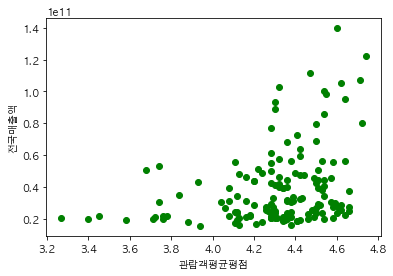

In [167]:
# 관람객 평균평점과 전국 매출액과의 관계 
graph = plt.plot(movie_fin.관람객평균평점, movie_fin.전국매출액, 'go')
plt.xlabel("관람객평균평점")
plt.ylabel("전국매출액")

Text(0, 0.5, '전국매출액')

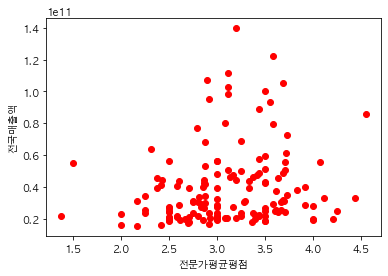

In [168]:
# 전문가 평균평점과 전국매출액과의 관계 
graph_2 = plt.plot(movie_fin.전문가평균평점, movie_fin.전국매출액, 'ro')
plt.xlabel("전문가평균평점")
plt.ylabel("전국매출액")

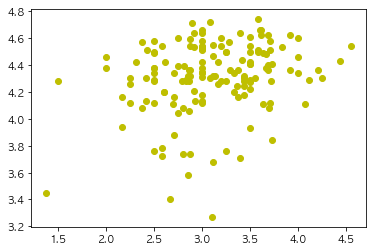

In [233]:
# 전문가 평균평점과 관람객 평균평점과의 상관관계 
graph_3 = plt.plot(movie_fin.전문가평균평점, movie_fin.관람객평균평점, 'yo')

**결론**
- 관람객 평균 평점과 전국 매출액은 비교적 얕은 양의 상관관계가 보이지만, 전문가 평균평점은 전국 매출액과 상관관계가 거의 없을 것으로 예측 
- 전문가 평균 평점과 관람객 평균평점도 큰 상관이 없는 것으로 예측 된다. 
- 정확한 관계 분석을 위해 상관분석을 진행한다 (셋 사이의 관계이기 때문에, t검정 대신 상관분석을 진행함) 


## 2. 상관 관계 분석 (상관계수)
**분석 방향**
- 궁금한 점 :  대중픽, 전문가 픽, 전국매출액에는 상관관계가 있을까? 
- 관람객평균평점(대중픽), 전문가평균평점(전문가픽), 전국매출액 간의 상관 관계를 확인하기 위해 상관관계 분석 진행 
- 귀무가설 : 관람객 평균평점과 전문가 평균평점, 전국 매출액은은 무관하다. 
- 대립가설 : 관람객 평균평점과 전문가 평균평점, 전국 매출액은 특정한 관계를 보인다. 

In [150]:
# 관람객 평균평점과 전국매출액간의 관계 
pg.corr(movie_fin.관람객평균평점, movie_fin.전국매출액)

,n,r,CI95%,p-val,BF10,power
pearson,150,0.329827,"[0.18, 0.47]",0.000038,459.204,0.986335


In [151]:
# 전문가 평균평점과 전국매출액 간의 관계 
pg.corr(movie_fin.전문가평균평점, movie_fin.전국매출액)

,n,r,CI95%,p-val,BF10,power
pearson,150,0.182567,"[0.02, 0.33]",0.025345,1.215,0.612249


In [152]:
# 전문가 평균평점과 관람객 평균평점의 관게 
pg.corr(movie_fin.전문가평균평점, movie_fin.관람객평균평점)

,n,r,CI95%,p-val,BF10,power
pearson,150,0.252977,"[0.1, 0.4]",0.001788,12.791,0.881925


**결론**
- 관람객평균평점과 매출액, 
- 관람객평균평점과 매출액에는 양의 상관관계가 존재한다. (p<0.05, 통계적으로 유의한 상관관계 / r =0.33)
- 전문가평균평점과 매출액에도 양의 상관관계가 있다. (p<0.05, 통계적으로 유의한 상관관계 / r = 0.18)
- 관람객평균평점과 전문가평균평점에도 양의 상관관계가 있다. (p<0.05, 통계적으로 유의한 상관관계 / r = 0.25)
- 관람객평균평점의 상관계수가 0.33으로 전문가평균평점의 상관계수보다 높게 측정된다. 하지만 r의 신뢰구간을 고려하면 대중픽이 매출액에 더 영향을 미치는지, 전문가픽이 매출액에 더 영향을 미치는지 확인할 수 없다. 
- 관람객평균평점과 매출액 사이의 상관관계 : 0.18 ~ 0.47, 전문가평균평점과 매출액 사이의 상관관계 : 0.02 ~ 0.33 
- 평균 점수만 봤을 때는 그래도 대중픽이 매출과 더 깊은 관계가 있다는 잠정적인 결론을 도출할 수 있다. 

## 3. 회귀분석 
**분석방향**
- 궁금한 점 : 대중의 평균평점과 전문가 평균평점으로 매출을 예상해볼 수 있을까? 
- 1) 관람객평균평점, 전국매출액의 단순회귀분석 
- 2) 전문가평균평점, 전국매출액의 단순회귀분석 
- 3) 관람객평균평점, 전문가평균평점, 전국매출액의 다중회귀분석 

### 1) 관람객 평균평점 단순 회귀분석 

In [200]:
audience_ols = ols("전국매출액 ~ 관람객평균평점", data=movie_fin).fit()
audience_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국매출액   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     18.07
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           3.76e-05
Time:                        15:45:29   Log-Likelihood:                -3790.7
No. Observations:                 150   AIC:                             7585.
Df Residuals:                     148   BIC:                             7591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.853e+10   3.01e+10     -2.940      0.004   -1.48e+11    -2.9e+10
관람객평균평점     2.965e+10   6.98e+09      4.250      0.000    1.59e+10    4.34e+10
==============================================================================
Omnibus:                       45.586   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.764
Skew:                           1.466   Prob(JB):                     2.90e-18
Kurtosis:                       5.079   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**결론**
- 회귀식 : 전국매출액 = 29650000000 * 관람객평균평점 - 88530000000 
- p<0.05이므로 관람객 평균평점과 매출액의 연관성은 통계적으로 유의하다. 
- 관람객 평균 평점이 높을 수록 전국 매출액은 높아질 가능성이 있다.
- 예측모형이 전국매출액 분산의 10.9%를 설명한다. (예측이 거의 도움되지 않는다)

In [189]:
# 관람객 평균 평점에 따라 매출액이 어떻게 달라지는지 확인할 수 있다. 
audience_expected = pd.DataFrame({'관람객평균평점' : [1.0, 2.0, 3.0, 4.0, 5.0]})
sell_expected_audience = audience_ols.predict(audience_expected)
sell_expected_audience

0   -5.887563e+10
1   -2.922384e+10
2    4.279495e+08
3    3.007974e+10
4    5.973153e+10
dtype: float64

### 2) 전문가 평균평점 단순 회귀분석 

In [190]:
critics_ols = ols("전국매출액 ~ 전문가평균평점", data=movie_fin).fit()
critics_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국매출액   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.103
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0253
Time:                        15:21:24   Log-Likelihood:                -3796.8
No. Observations:                 150   AIC:                             7598.
Df Residuals:                     148   BIC:                             7604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.414e+10   1.13e+10      1.255      0.212   -8.13e+09    3.64e+10
전문가평균평점     8.079e+09   3.58e+09      2.259      0.025    1.01e+09    1.51e+10
==============================================================================
Omnibus:                       58.053   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.378
Skew:                           1.723   Prob(JB):                     2.19e-28
Kurtosis:                       5.915   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**결론**
- 회귀식 : 전국매출액 = 8079000000 * 관람객평균평점 + 14140000000
- p<0.05이므로 전문가 평균평점과 전국매출액의 연관성은 통계적으로 유의하다.
- 전문가 평균 평점이 높을 수록 전국 매출액은 높아질 가능성이 있다.
- 예측모형이 전국매출액 분산의 3.3%를 설명한다 (예측이 거의 도움되지 않는다..) 

In [194]:
# 전문가 평균 평점에 따라 매출액이 어떻게 달라지는지 확인할 수 있다. 
critics_expected = pd.DataFrame({'전문가평균평점' : [1.0, 2.0, 3.0, 4.0, 5.0]})
sell_expected_critics = critics_ols.predict(critics_expected)
sell_expected_critics

0    2.222047e+10
1    3.029986e+10
2    3.837924e+10
3    4.645862e+10
4    5.453800e+10
dtype: float64

In [199]:
# 전문가 평점이 1.0대일 때도 수익이 나는 기이한 현상을 볼 수 있다. 

### 3) 관람객평균평점, 전문가평균평점의 다중회귀분석 

In [196]:
audi_crit_ols = ols("전국매출액 ~ 관람객평균평점 + 전문가평균평점", data=movie_fin).fit()
audi_crit_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국매출액   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     9.955
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           8.82e-05
Time:                        15:28:01   Log-Likelihood:                -3789.8
No. Observations:                 150   AIC:                             7586.
Df Residuals:                     147   BIC:                             7595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.269e+10   3.02e+10     -3.069      0.003   -1.52e+11    -3.3e+10
관람객평균평점     2.724e+10   7.19e+09      3.788      0.000     1.3e+10    4.15e+10
전문가평균평점     4.687e+09   3.54e+09      1.324      0.188   -2.31e+09    1.17e+10
==============================================================================
Omnibus:                       45.452   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.009
Skew:                           1.455   Prob(JB):                     2.57e-18
Kurtosis:                       5.120   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**결론**
- f<0.05이므로 전체 식의 통계적 유의성은 검증된다. 
- 관람객평균평점의 p-value < 0.05이므로 관람객 평균 평점이 높을 수록 전국 매출액은 높아질 가능성이 있다.
- 전문가평균평점의 p-value > 0.05이므로 전무가 평균 평점이 매출엑에 미치는 인과관계를 설명할 수 없다. 
- 조정된 결정 계수는 10.7%로 예측모형이 전국매출액 분산의 10.7%를 설명한다. (예측이 거의 도움되지 않는다)

## 중간 결론 
- 관람객평균평점과 전문가 평균평점은 각각 전국매출액과 유의미한 상관관계를 가진다. 
- 관람객평균평점은 단순회귀분석과 다중회귀분석에서 매출에 유의미한 영향력을 준다. 반면 전문가평균평점은 단순 회귀분석에서는 매출에 유의미한 영향력을 주지만, 다중회귀분석에서는 영향력이 제한되어 있음을 확인할 수 있었다. 

# III. 대중픽과 전문가 픽의 그룹별 상관관계 분석 
- 현재까지는 단순히 관람객평균평점의 분포와 전국매출액의 관계를 살펴보았다. 
- 세 번째 파트에서는 대중이 더 선호하는 영화가 정말 매출액이 높은지, 전문가가 더 선호하는 영화의 매출액이 높은지 확인하고자 한다. 

## 1. 대중픽 영화와 전문가픽 영화 분류
**분석방향**
- 대중이 선호하는 영화 고르기 (대중 평점 > 전문가 평점인 영화만 인덱싱하여 확인한다)
- 전문가가 선호하는 영화 고르기 (대중 평점 < 전문가 평점인 영화만 인덱싱) 
- 전문가 평점이 높은 영화가 2개밖에 없기 때문에 표본 이슈가 있을 수 있다는 점을 고려해야 할 것

In [218]:
audience_pick = movie_fin[movie_fin['관람객평균평점'] > movie_fin['전문가평균평점']]
critics_pick = movie_fin[movie_fin['관람객평균평점'] < movie_fin['전문가평균평점']]

## 2. 기초통계량 분석 
**분석방향**
- 대중픽 영화의 매출액 평균, 표준편차, 매출액 분포, 평점 분포
- 전문가픽 영화의 매출액 평균, 표준편차, 매출액 분포, 평점 분포

### 1) 대중픽 영화의 통계 

In [249]:
# 매출 관련 통계 
# 대중픽 영화
audience_pick.describe()

,개봉연도,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
count,148.000000,1.480000e+02,1.480000e+02,148.000000,148.000000,148.000000,148.000000
mean,2017.000000,3.893975e+10,4.726002e+06,1278.148649,4.305608,3.084324,3.568919
std,1.409395,2.414371e+10,2.891096e+06,411.784343,0.271158,0.527854,0.357019
min,2015.000000,1.541792e+10,1.804112e+06,496.000000,3.270000,1.380000,2.400000
25%,2016.000000,2.157320e+10,2.670843e+06,1012.000000,4.200000,2.750000,3.400000
50%,2017.000000,3.037642e+10,3.655387e+06,1190.000000,4.340000,3.000000,3.600000
75%,2018.000000,4.661786e+10,5.558482e+06,1485.250000,4.500000,3.500000,3.800000
max,2019.000000,1.396480e+11,1.626494e+07,2835.000000,4.740000,4.250000,4.200000


(array([67., 29., 24., 11.,  4.,  3.,  4.,  4.,  1.,  1.]),
 array([1.54179229e+10, 2.78409286e+10, 4.02639342e+10, 5.26869399e+10,
        6.51099456e+10, 7.75329512e+10, 8.99559569e+10, 1.02378963e+11,
        1.14801968e+11, 1.27224974e+11, 1.39647980e+11]),
 <BarContainer object of 10 artists>)

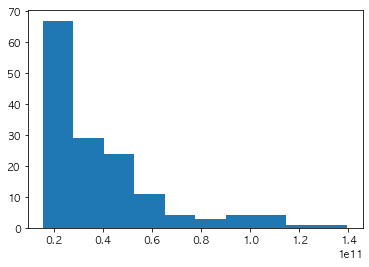

In [216]:
plt.hist(audience_pick.전국매출액)
# 영화 매출이 주로 200억 내에 집중되어 있음을 확인할 수 있다. 

### 2) 전문가픽 영화의 통계

In [220]:
critics_pick.describe()

,개봉연도,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
count,2.000000,2.000000e+00,2.000000e+00,2.000000,2.000000,2.000000,2.000000
mean,2017.000000,5.939516e+10,6.963858e+06,1373.500000,4.485000,4.495000,4.250000
std,2.828427,3.746082e+10,4.414350e+06,812.465692,0.077782,0.077782,0.070711
min,2015.000000,3.290636e+10,3.842441e+06,799.000000,4.430000,4.440000,4.200000
25%,2016.000000,4.615076e+10,5.403150e+06,1086.250000,4.457500,4.467500,4.225000
50%,2017.000000,5.939516e+10,6.963858e+06,1373.500000,4.485000,4.495000,4.250000
75%,2018.000000,7.263956e+10,8.524566e+06,1660.750000,4.512500,4.522500,4.275000
max,2019.000000,8.588396e+10,1.008528e+07,1948.000000,4.540000,4.550000,4.300000


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.29063645e+10, 3.82041244e+10, 4.35018843e+10, 4.87996442e+10,
        5.40974041e+10, 5.93951641e+10, 6.46929240e+10, 6.99906839e+10,
        7.52884438e+10, 8.05862037e+10, 8.58839636e+10]),
 <BarContainer object of 10 artists>)

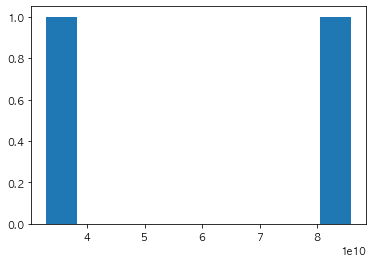

In [219]:
plt.hist(critics_pick.전국매출액)
# 표본 수가 적어서 분포 확인이 어려움 

**결론**
- 대중픽 영화도 매출액이 큰 영화에 의해 평균액이 좌우되는 것을 확인할 수 있다. 
- 전문가픽 영화는 표본 수가 너무 작아서 통계를 유의미하게 낼 수 없음 

## 3. 상관관계 분석 

### 1) 대중픽 영화의 평점과 매출액 사이의 관계 분석 

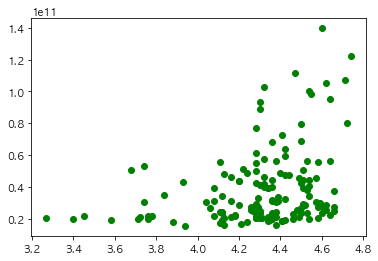

In [225]:
# 대중픽 영화의 관람객 평균평점과 전국 매출액과의 관계 (분포표)
graph = plt.plot(audience_pick.관람객평균평점, audience_pick.전국매출액, 'go')

In [230]:
#양의 상관관계가 있음을 확인 (상관관계가 조금 떨어졌다. )
pg.corr(audience_pick.관람객평균평점, audience_pick.전국매출액)

,n,r,CI95%,p-val,BF10,power
pearson,148,0.324611,"[0.17, 0.46]",0.000057,312.836,0.982481


### 2) 전문가픽 영화의 평점과 매출액 사이의 관계 분석 

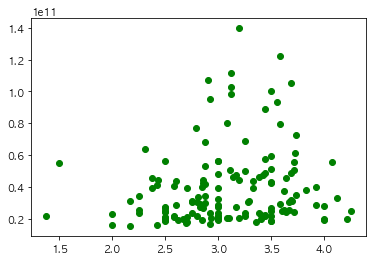

In [227]:
# 대중픽 영화의 전문가 평균평점과 전국 매출액과의 관계 
graph = plt.plot(audience_pick.전문가평균평점, audience_pick.전국매출액, 'go')

In [231]:
# #양의 상관관계가 있음을 확인 (상관관계가 조금 떨어졌다. )
pg.corr(audience_pick.전문가평균평점, audience_pick.전국매출액)

,n,r,CI95%,p-val,BF10,power
pearson,148,0.161651,"[0.0, 0.31]",0.049667,0.693,0.50383


In [235]:
#  양의 상관관계가 있지만, 상관계수가 이전보다 더 떨어졌음
# 대중픽 영화에서는 전문가 평점이 매출액과 상관성이 떨어지는 사실을 발견! 

## 이슈 

- 못구한다. 
- 대중픽과 전문가픽의 정의를 새롭게 해야할 것 같다. 
- 대중픽은 대중이 평점을 높게 매긴 상위 30개 영화 
- 전문가픽은 전문가가 평점을 높게 매긴 상위 30개 영화 이런 식으로 바꿔보면 어떨까?  -> 여기에서 생기는 이슈는 이미 매출액 기준으로 영화를 150개를 잘랐기 때문에 자른 매출액 때문에 영향을 받지 않을까? !! 

# 다시 구해보자 
- 대중픽은 150개 영화 중에 관람객의 평균평점이 높은 상위 30개 영화 
- 전문가픽은 150개 영화 전문가의 평균평점이 높은 상위 30개 영화 

## 1. 영화 분류

In [241]:
audience_pick2 = movie_fin.sort_values(by ='관람객평균평점', ascending = False).head(30)
critics_pick2 = movie_fin.sort_values(by ='전문가평균평점', ascending = False).head(30)

## 2. 기초통계량 분석 

In [243]:
audience_pick2.describe()

,개봉연도,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
count,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.00000,30.000000
mean,2017.433333,5.395002e+10,6.523482e+06,1363.233333,4.604333,3.27300,3.883333
std,1.501340,3.560142e+10,4.199025e+06,520.763742,0.057095,0.48796,0.196668
min,2015.000000,1.953237e+10,2.285143e+06,661.000000,4.530000,2.38000,3.500000
25%,2016.250000,2.729409e+10,3.404342e+06,990.500000,4.555000,2.94000,3.700000
50%,2018.000000,3.754652e+10,4.741373e+06,1312.000000,4.600000,3.20000,3.900000
75%,2019.000000,8.441558e+10,9.870102e+06,1561.750000,4.640000,3.61500,4.000000
max,2019.000000,1.396480e+11,1.626494e+07,2835.000000,4.740000,4.55000,4.300000


In [245]:
critics_pick2.describe()

,개봉연도,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
count,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,2016.766667,4.111145e+10,4.988944e+06,1219.733333,4.401333,3.847667,3.820000
std,1.406471,2.144628e+10,2.643678e+06,370.258990,0.198125,0.257611,0.279655
min,2015.000000,1.937990e+10,2.254430e+06,661.000000,3.840000,3.580000,3.200000
25%,2016.000000,2.534414e+10,3.094613e+06,971.000000,4.310000,3.675000,3.700000
50%,2016.500000,3.288113e+10,3.927665e+06,1189.500000,4.420000,3.715000,3.900000
75%,2018.000000,4.988707e+10,6.126154e+06,1424.000000,4.537500,4.000000,4.000000
max,2019.000000,1.050248e+11,1.339540e+07,1991.000000,4.660000,4.550000,4.300000


## 3. 상관관계 분석 

### 1) 대중픽 영화의 평점과 매출액 사이의 상관분석 

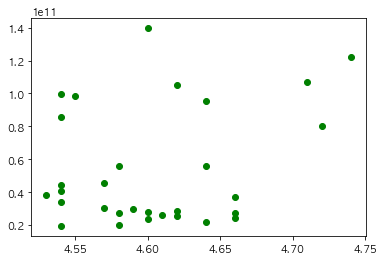

In [250]:
# 대중픽 영화의 관람객 평균평점과 전국 매출액과의 관계 (분포표)
graph = plt.plot(audience_pick2.관람객평균평점, audience_pick2.전국매출액, 'go')

In [251]:
#양의 상관관계가 있음을 확인 (상관관계가 조금 떨어졌다. )
pg.corr(audience_pick2.관람객평균평점, audience_pick2.전국매출액)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.262606,"[-0.11, 0.57]",0.160921,0.58,0.293724


### 2) 전문가픽 영화의 평점과 매출액 사이의 상관분석 

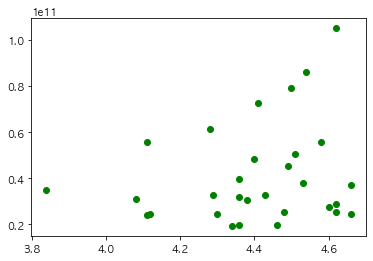

In [252]:
# 대중픽 영화의 관람객 평균평점과 전국 매출액과의 관계 (분포표)
graph = plt.plot(critics_pick2.관람객평균평점, critics_pick2.전국매출액, 'go')

In [253]:
pg.corr(critics_pick2.관람객평균평점, critics_pick2.전국매출액)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.210777,"[-0.16, 0.53]",0.263552,0.412,0.203239
